In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
from pathlib import Path

data_dir = Path("/content/drive/MyDrive/ahead/")
data_dir.is_dir()

True

In [3]:
# !pip uninstall -y ahead

In [4]:
!pip install -qqq git+https://github.com/phunc20/ahead.git

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.3/82.3 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 81.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 96.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 74.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.2/244.2 kB 24.8 MB/s eta 0:00:00


In [5]:
!pip list | grep "^transfor"

transformers                     4.31.0


In [18]:
import FlowCal
import numpy as np
import pandas as pd
from ahead.util import get_fsc_ssc_chunks
from PIL import Image
from transformers import pipeline

In [7]:
pipe = pipeline("image-classification",
                "phunc20/swin-tiny-patch4-window7-224-finetuned-wuhan")

In [8]:
file_flow_id = "flowrepo_covid_EU_013_flow_001"
fcs_path = next((data_dir/f'raw_fcs/{file_flow_id}').glob("*.fcs"))
fcs_path

PosixPath('/content/drive/MyDrive/ahead/raw_fcs/flowrepo_covid_EU_013_flow_001/export_COVID19 samples 21_04_20_ST3_COVID19_ICU_014_A ST3 210420_073_Live_cells.fcs')

In [20]:
# Let's peek into this file_flow_id's label
df_summary = pd.read_csv(data_dir/"summary.csv")
df_summary.loc[df_summary["file_flow_id"]==file_flow_id, :]

,file_flow_id,n_events,wuhan
10,flowrepo_covid_EU_013_flow_001,170075,False


So this is a **healthy** guy.

In [9]:
chunk_generator = get_fsc_ssc_chunks(
    fcs_path,
    chunk_size=10_000,
    typ="A",
    gate_fraction=0.75,
)

In [10]:
chunk = next(chunk_generator)
chunk.shape

(10000, 2)

In [11]:
FlowCal.plot.density2d(
    chunk,
    mode="scatter",
    savefig="chunk.png",
)

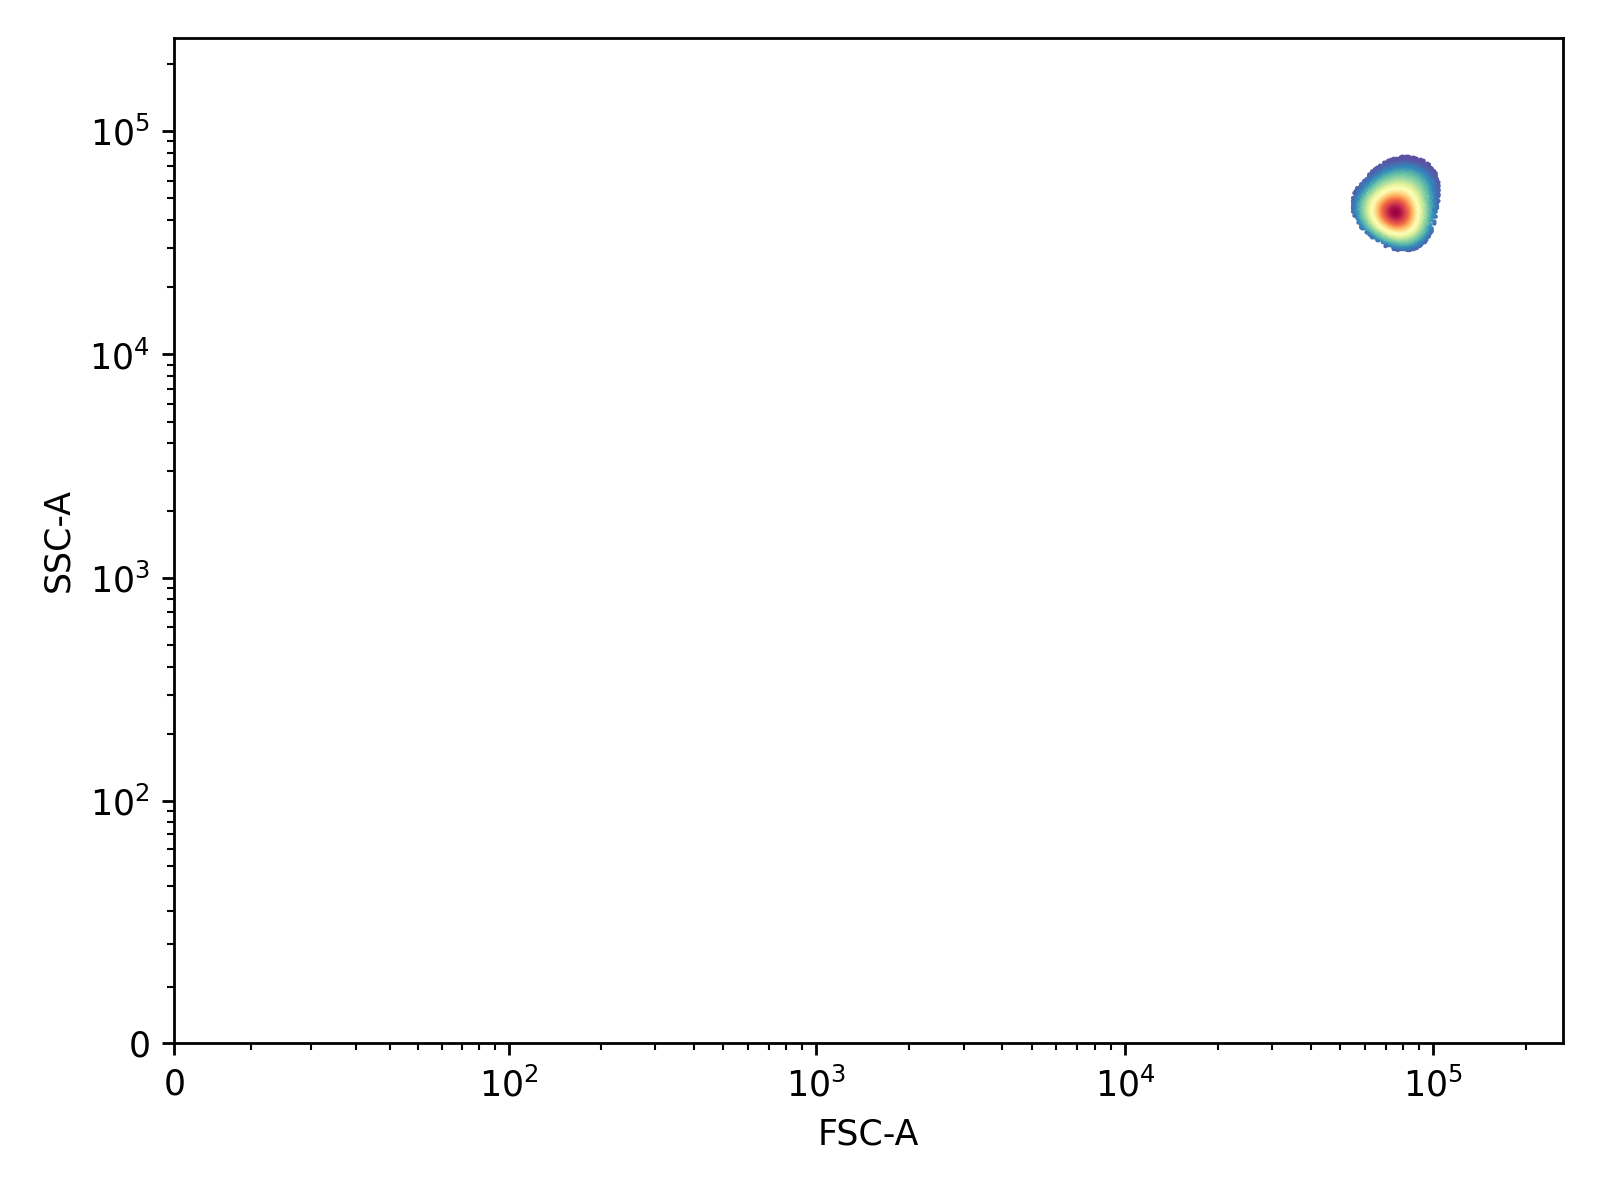

In [12]:
image = Image.open("chunk.png")
image

In [13]:
pipe(image)

[{'score': 0.6588024497032166, 'label': 'sick'},
 {'score': 0.34119752049446106, 'label': 'healthy'}]

In [14]:
another_chunk_generator = get_fsc_ssc_chunks(
    fcs_path,
    chunk_size=np.inf,
    typ="A",
    gate_fraction=0.75,
)

In [15]:
another_chunk = next(another_chunk_generator)
another_chunk.shape

(127560, 2)

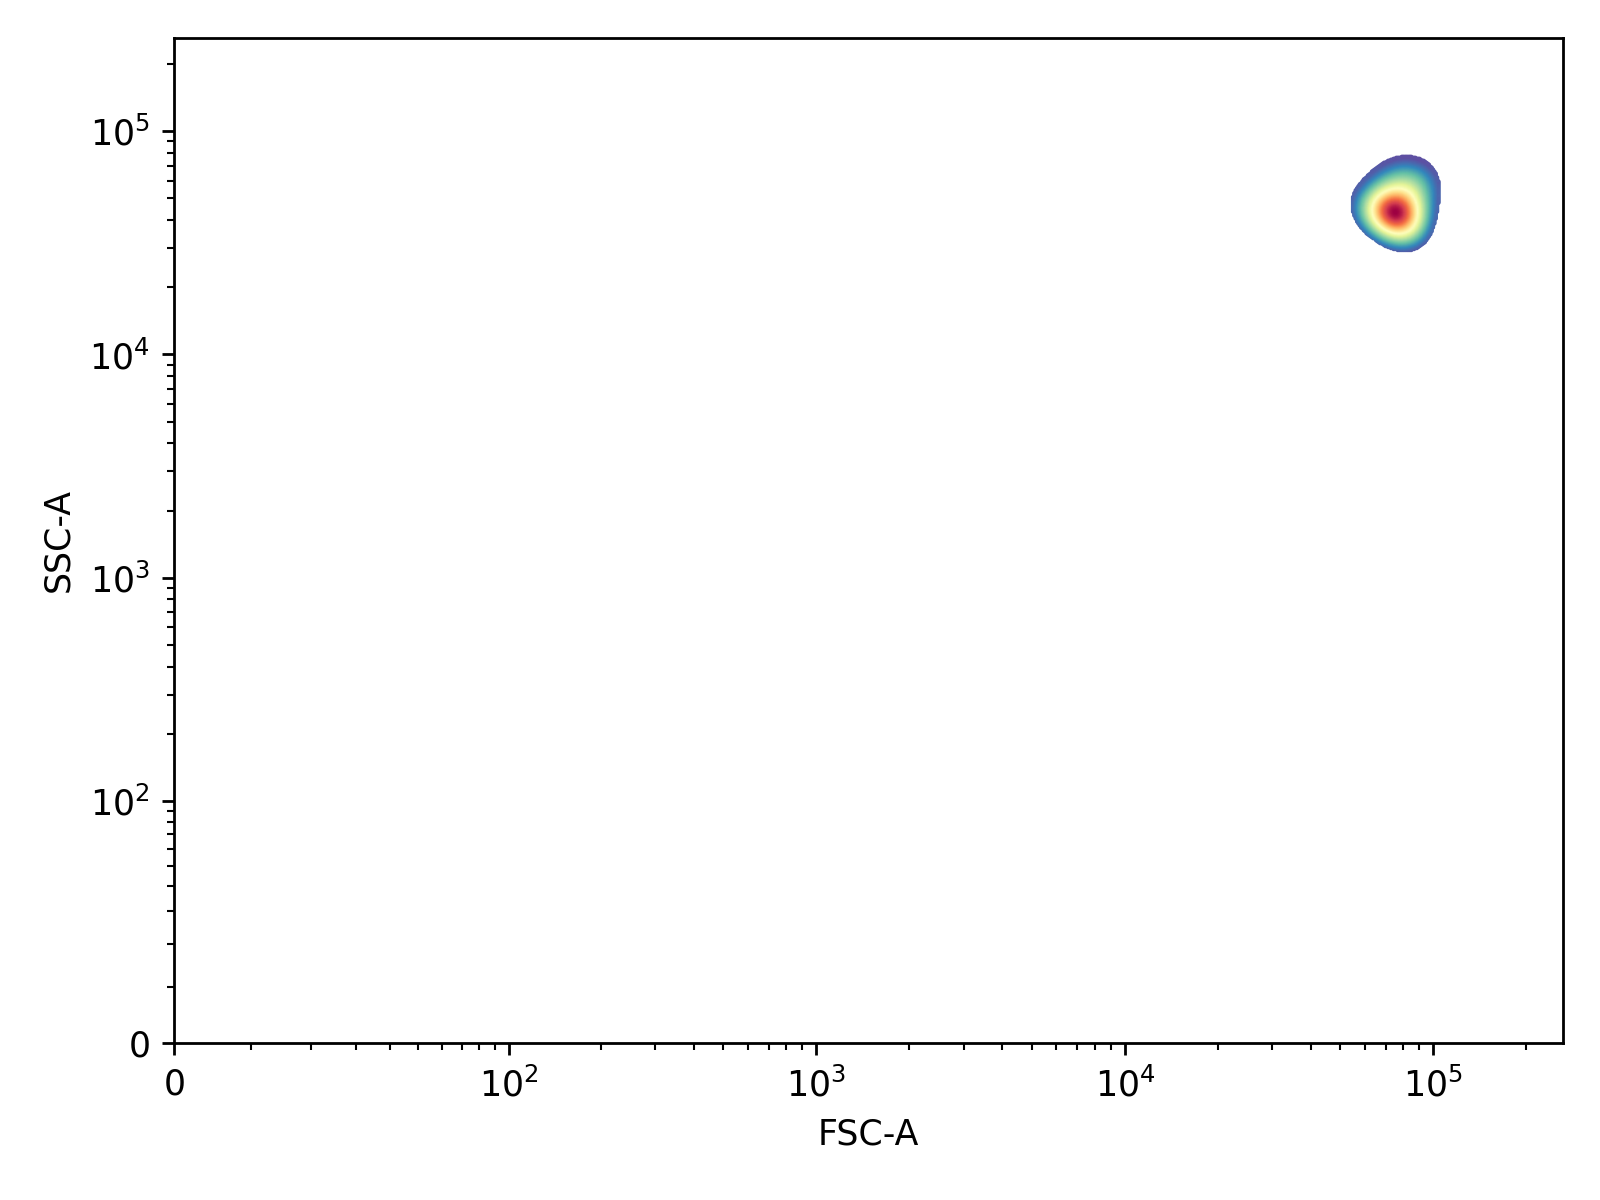

In [16]:
FlowCal.plot.density2d(
    another_chunk,
    mode="scatter",
    savefig="another_chunk.png",
)
image = Image.open("another_chunk.png")
image

In [17]:
pipe(image)

[{'score': 0.6583296656608582, 'label': 'sick'},
 {'score': 0.34167033433914185, 'label': 'healthy'}]